In [149]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [150]:
df = pd.read_csv('/content/titanic_dataset - titanic_dataset.csv')

In [151]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [152]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [154]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **remove missing values**

In [155]:
df.drop(["Cabin"], axis = 1, inplace = True)
df.dropna(inplace = True)

In [156]:
# Fill missing values in the 'Age' column with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the most frequent value
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)


In [157]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [158]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [159]:
# Assuming df is your DataFrame
columns_to_remove = ['Name', 'Ticket']

# Check if the columns exist before dropping them
missing_columns = [col for col in columns_to_remove if col not in df.columns]

if not missing_columns:
    # Drop specified columns
    df = df.drop(columns=columns_to_remove, axis=1)
    print("Columns removed successfully.")
else:
    print(f"Error: Columns {missing_columns} not found in the DataFrame.")

Columns removed successfully.


In [160]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# **convert catregorical into numerical**

In [161]:
categorical_columns = ['Sex', 'Embarked']

In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for columns in categorical_columns:
  df['Sex'] = le.fit_transform(df['Sex'])
  df['Embarked'] = le.fit_transform(df['Embarked'])

# **Taget Varibale**

In [163]:
x = df.drop(['Survived'], axis = 1)
y = df['Survived']

<Axes: xlabel='Survived', ylabel='Count'>

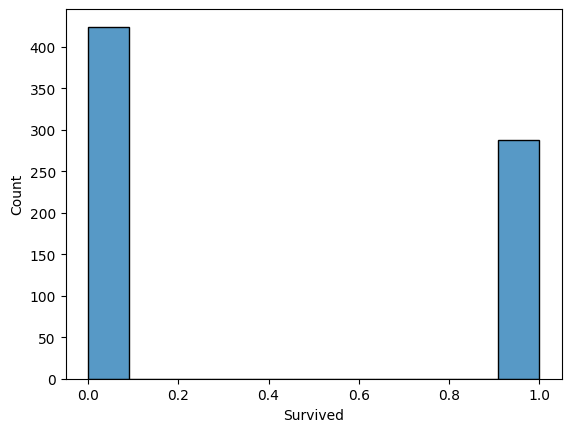

In [164]:
sns.histplot(df['Survived'])

# **Model Evaluation**

In [165]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

# **Feature Scaling**

In [166]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
Sc.fit_transform(x_train, y_train)

array([[ 0.06443997, -0.28934006, -1.31741297, ...,  1.89356532,
        -0.09238956,  0.49421974],
       [-0.09105767, -0.28934006, -1.31741297, ..., -0.48226416,
        -0.12995881,  0.49421974],
       [ 0.81860357, -0.28934006,  0.75906343, ..., -0.48226416,
        -0.40904465,  0.49421974],
       ...,
       [-0.45647715,  0.91237159,  0.75906343, ..., -0.48226416,
        -0.51531196,  0.49421974],
       [ 0.36377295, -0.28934006,  0.75906343, ...,  0.70565058,
         0.10082372,  0.49421974],
       [-1.26117747,  0.91237159,  0.75906343, ..., -0.48226416,
        -0.5367801 ,  0.49421974]])

# **Logistic Regression**

In [167]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

# **Model score**

In [168]:
from sklearn.metrics import accuracy_score
y_pred_log_reg = log_reg.predict(x_test)
print("LogisticRegression")
print("------")
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg)* 100, 2)
print('Accuracy', log_reg_accuracy,'%')

LogisticRegression
------
Accuracy 76.22 %


[[68 12]
 [22 41]]
precision 0.7622377622377622
recall 0.7622377622377622


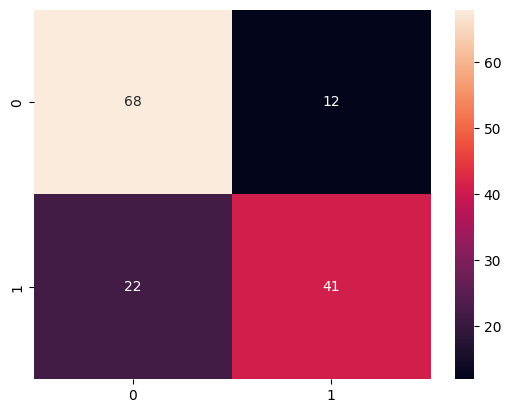

In [169]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

precision = precision_score(y_test, y_pred_log_reg, average = 'micro')
recall = recall_score(y_test, y_pred_log_reg, average = 'micro')
print('precision', precision)
print('recall', recall)
